In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/GenerativeAI tweets.csv'
tweets_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
tweets_df.head()


,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
2,2,2023-04-19 21:26:57+00:00,1648800376479715328,Mind blowing next wave #generativeai platform...,timreha
3,3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle


In [ ]:
####### CLEANING
import re

# Drop missing values
tweets_df_cleaned = tweets_df.dropna()

# Extract only the date component of the 'Datetime' column
# Assuming 'Datetime' is a column in your DataFrame
tweets_df_cleaned['Date'] = pd.to_datetime(tweets_df_cleaned['Datetime']).dt.date

# Check the range of dates
date_range = (tweets_df_cleaned['Date'].min(), tweets_df_cleaned['Date'].max())

# Check unique values in each column
unique_values = {col: tweets_df_cleaned[col].nunique() for col in tweets_df_cleaned.columns}

# Preprocess the 'Text' column to remove links, hashtags, mentions, and unwanted characters
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'\@\w+|\#','', tweet)  # Remove mentions and hashtags
    tweet = re.sub(r'[^A-Za-z0-9 ]+', '', tweet)  # Remove special characters
    tweet = tweet.lower()  # Convert to lowercase
    return tweet

tweets_df_cleaned['Cleaned_Text'] = tweets_df_cleaned['Text'].apply(clean_tweet)

# Displaying the cleaned dataset
# tools.display_dataframe_to_user(name="Cleaned Tweets Data", dataframe=tweets_df_cleaned) # Commented out as 'tools' is not defined

# Display the results
date_range, unique_values

((datetime.date(2022, 4, 21), datetime.date(2023, 4, 19)),
 {'Unnamed: 0': 56221,
  'Datetime': 55528,
  'Tweet Id': 56221,
  'Text': 55596,
  'Username': 14373,
  'Date': 341})

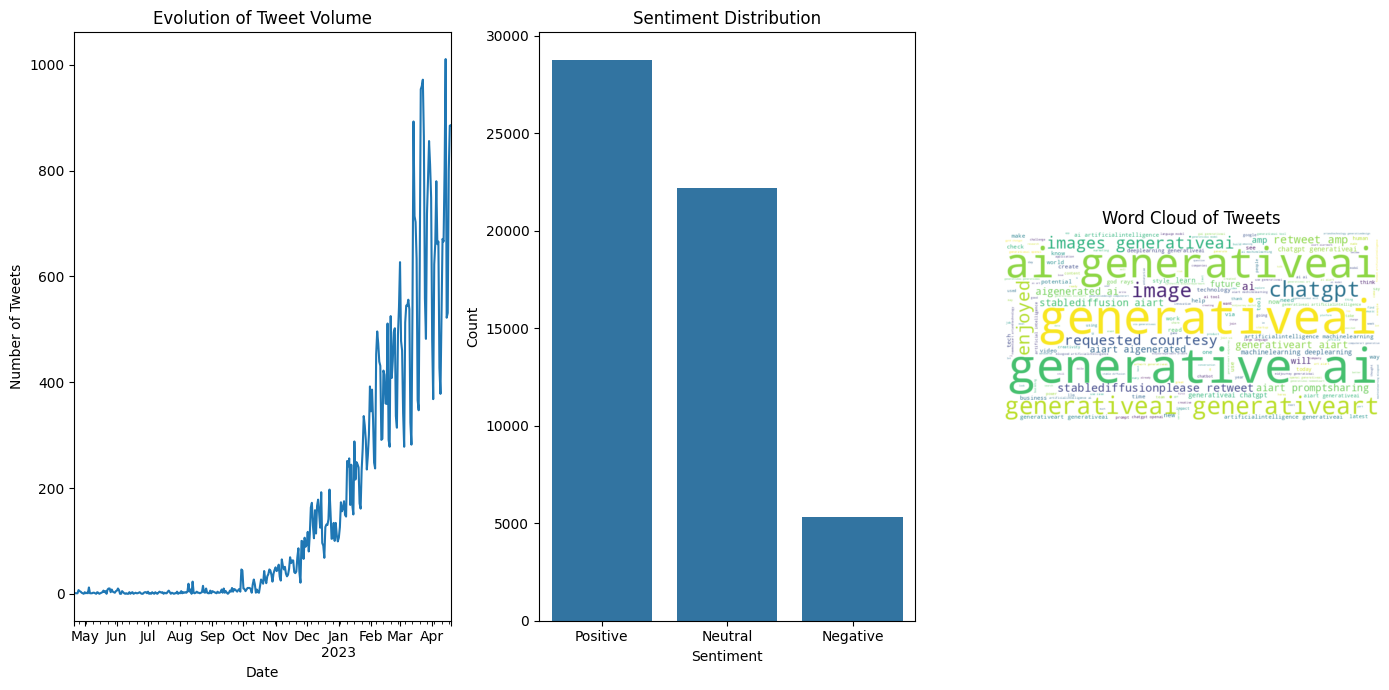

In [ ]:
##### Analyse
# Import necessary libraries for analysis
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob

# General Trends: Evolution of tweet volume over time
tweets_df_cleaned['Datetime'] = pd.to_datetime(tweets_df_cleaned['Datetime'])
tweets_df_cleaned.set_index('Datetime', inplace=True)
tweet_volume = tweets_df_cleaned.resample('D').size()

# Sentiment Analysis: Adding a sentiment score for each tweet
tweets_df_cleaned['Sentiment'] = tweets_df_cleaned['Cleaned_Text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets_df_cleaned['Sentiment_Label'] = tweets_df_cleaned['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
sentiment_distribution = tweets_df_cleaned['Sentiment_Label'].value_counts()

# Word Cloud: Generating a word cloud for the most frequent terms
text = ' '.join(tweets_df_cleaned['Cleaned_Text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plotting tweet volume over time
plt.subplot(1, 3, 1)
tweet_volume.plot()
plt.title('Evolution of Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Plotting sentiment distribution
plt.subplot(1, 3, 2)
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Plotting word cloud
plt.subplot(1, 3, 3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')

plt.tight_layout()
plt.show()


In [ ]:
import nltk
nltk.download('punkt') # Download the punkt resource for sentence tokenization
nltk.download('stopwords')
nltk.download('wordnet') # Download the wordnet resource for lemmatization

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
import re
import random
# Randomly select 20,000 tweets
tweets_df_sampled = tweets_df_cleaned.sample(n=20000, random_state=1)

# Text Preprocessing for LDA
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
docs = tweets_df_sampled['Cleaned_Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x) if word.isalpha() and word not in stop_words])

# Create a dictionary of words and their frequency
dictionary = corpora.Dictionary(docs)

# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Topic modeling using LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Print the topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print('\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic: 0 
Words: 0.043*"art" + 0.039*"midjourney" + 0.035*"aiart" + 0.033*"digitalart" + 0.029*"video" + 0.028*"generativeart" + 0.025*"aiartwork" + 0.020*"today" + 0.019*"nft" + 0.018*"metaverse"


Topic: 1 
Words: 0.063*"content" + 0.039*"article" + 0.022*"app" + 0.019*"already" + 0.018*"gai" + 0.017*"creator" + 0.016*"midjourneyai" + 0.015*"launch" + 0.015*"transforming" + 0.015*"capability"


Topic: 2 
Words: 0.036*"aiart" + 0.036*"stablediffusion" + 0.031*"generativeart" + 0.025*"aigenerated" + 0.022*"data" + 0.014*"generativeai" + 0.013*"world" + 0.013*"prompt" + 0.012*"create" + 0.011*"business"


Topic: 3 
Words: 0.056*"use" + 0.036*"company" + 0.027*"way" + 0.026*"industry" + 0.022*"text" + 0.019*"news" + 0.016*"user" + 0.015*"let" + 0.014*"case" + 0.013*"cloud"


Topic: 4 
Words: 0.223*"generativeai" + 0.168*"ai" + 0.040*"generative" + 0.024*"new" + 0.021*"amp" + 0.014*"model" + 0.012*"tool" + 0.011*"future" + 0.009*"using" + 0.008*"latest"


Topic: 5 
Words: 0.035*"potential

In [ ]:
# Word Cloud: Generating a word cloud for the most frequent terms excluding specific words
stopwords = set(['generative', 'ai', 'chatgpt', 'gpt', 'chat', 'generativeai'])
text = ' '.join(tweets_df_cleaned['Cleaned_Text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)


Text(0.5, 1.0, 'Word Cloud of Tweets')

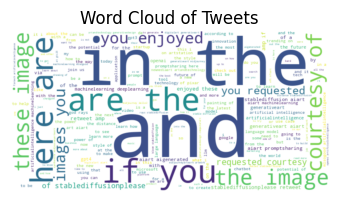

In [ ]:
# Plotting word cloud
plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


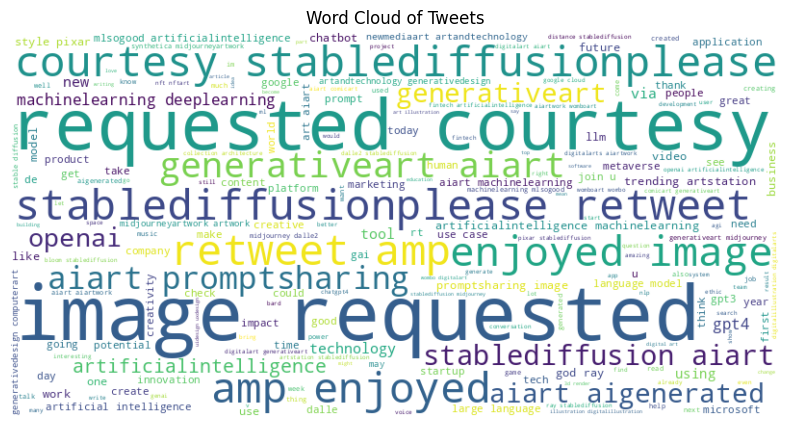

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Assurez-vous de télécharger les ressources nécessaires de nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
# Lemmatisation des mots et suppression des mots de base
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Liste des mots de base en anglais

def preprocess_text(text):
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatisation et suppression des mots de base
    return ' '.join(words)

tweets_df_cleaned['Processed_Text'] = tweets_df_cleaned['Cleaned_Text'].apply(preprocess_text)

# Génération du word cloud en excluant les mots spécifiques
exclude_words = set(['generative', 'ai', 'chatgpt', 'gpt', 'chat', 'generativeai'])
final_stopwords = stop_words.union(exclude_words)

text = ' '.join(tweets_df_cleaned['Processed_Text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=final_stopwords).generate(text)

# Affichage du word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

# Fonction pour obtenir les n-grammes les plus fréquents
def get_top_n_ngrams(corpus, n=None, ngram=2):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Obtenir les 20 bigrammes les plus fréquents
common_bigrams = get_top_n_ngrams(tweets_df_cleaned['Processed_Text'], 20, ngram=2)

# Obtenir les 20 trigrammes les plus fréquents
common_trigrams = get_top_n_ngrams(tweets_df_cleaned['Processed_Text'], 20, ngram=3)

# Les convertir en dataframes
df_bigrams = pd.DataFrame(common_bigrams, columns=['NgramText', 'count'])
df_trigrams = pd.DataFrame(common_trigrams, columns=['NgramText', 'count'])

# Tracer les bigrammes
fig_bigrams = px.bar(df_bigrams[1:], x='NgramText', y='count', title='Bigram Counts', color = 'count', width=1200, height=800)
fig_bigrams.show()

# Tracer les trigrammes
fig_trigrams = px.bar(df_trigrams, x='NgramText', y='count', title='Trigram Counts', color = 'count', width=1200, height=800)
fig_trigrams.show()

In [ ]:
import spacy
from spacy.matcher import Matcher

# Charger le modèle anglais de spaCy
nlp = spacy.load('en_core_web_sm')

# Créer un matcher pour détecter les patterns des tâches
matcher = Matcher(nlp.vocab)

# Ajouter des patterns au matcher
patterns = [
    [{"LOWER": "chatgpt"}, {"POS": "VERB"}, {"POS": "NOUN"}],
    [{"LOWER": "gpt"}, {"POS": "VERB"}, {"POS": "NOUN"}],
    [{"LOWER": "ai"}, {"POS": "VERB"}, {"POS": "NOUN"}],
]

matcher.add("TASK_PATTERN", patterns)

# Fonction pour extraire les tâches
def extract_tasks(doc):
    tasks = []
    matches = matcher(doc)
    for match_id, start, end in matches:
        span = doc[start:end]
        tasks.append(span.text)
    return tasks

# Appliquer la fonction sur les tweets
tweets_df_cleaned['Tasks'] = tweets_df_cleaned['Processed_Text'].apply(lambda x: extract_tasks(nlp(x)))

# Filtrer les tweets avec des tâches identifiées
tweets_with_tasks = tweets_df_cleaned[tweets_df_cleaned['Tasks'].str.len() > 0]


In [ ]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util

# Charger le modèle BERT pour les embeddings de phrases
model = SentenceTransformer('stsb-distilbert-base')

# Exemples de compétences de la base de données ESCO
esco_skills = [
    "Communication",
    "Collaboration",
    "Creativity",
    "Information Skills",
    "Assisting and Caring",
    "Management Skills",
    "Working with Computers",
    "Core Skills and Competences",
    "Thinking Skills and Competences",
    "Self-management Skills and Competences",
    "Social and Communication Skills and Competences",
    "Life Skills and Competences"
]

# Calculer les embeddings pour les compétences
skill_embeddings = model.encode(esco_skills, convert_to_tensor=True)

# Fonction pour trouver les compétences similaires
def find_similar_skills(task):
    task_embedding = model.encode(task, convert_to_tensor=True)
    cos_sim = util.pytorch_cos_sim(task_embedding, skill_embeddings)
    top_matches = cos_sim[0].topk(3)
    similar_skills = [(esco_skills[idx], score.item()) for idx, score in zip(top_matches.indices, top_matches.values)]
    return similar_skills

# Appliquer la fonction sur les tâches identifiées
tweets_with_tasks['Similar_Skills'] = tweets_with_tasks['Tasks'].apply(lambda x: find_similar_skills(' '.join(x)))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/489 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-19-4b433a932b26>:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Analyse de sentiment
tweets_with_tasks['Sentiment'] = tweets_with_tasks['Processed_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_with_tasks['Sentiment_Label'] = tweets_with_tasks['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
sentiment_distribution = tweets_with_tasks['Sentiment_Label'].value_counts()

# Tracer la distribution des sentiments
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
